# **Library Importing**

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder


# **Dataset Reading**

In [2]:
df=pd.read_csv("/content/sample_data/Automobile_data.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.ndim

2

In [6]:
df.size

5330

In [7]:
df.duplicated().sum()

0

# **Converting Objects to Categorical Values**

In [8]:
obj_col =df.select_dtypes("object")

In [9]:
obj_col

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,16845
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300,19045
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500,21485
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.4,106,4800,22470


In [10]:
for colname in obj_col:
    df[colname]=df[colname].astype('category')

# **Checking Missing Values**

In [11]:
(df[(df.columns)]=="?").sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [12]:
a=df[df["normalized-losses"]=="?"]["normalized-losses"].groupby(df["make"]).count()
print(a)

make
alfa-romero      3
audi             3
bmw              4
chevrolet        0
dodge            0
honda            0
isuzu            4
jaguar           2
mazda            2
mercedes-benz    3
mercury          1
mitsubishi       3
nissan           0
peugot           4
plymouth         1
porsche          4
renault          2
saab             0
subaru           0
toyota           1
volkswagen       4
volvo            0
Name: normalized-losses, dtype: int64


In [13]:
b=df["normalized-losses"].groupby(df["make"]).count()
print(b)

make
alfa-romero       3
audi              7
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             4
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           18
peugot           11
plymouth          7
porsche           5
renault           2
saab              6
subaru           12
toyota           32
volkswagen       12
volvo            11
Name: normalized-losses, dtype: int64


In [14]:
a/b

make
alfa-romero      1.000000
audi             0.428571
bmw              0.500000
chevrolet        0.000000
dodge            0.000000
honda            0.000000
isuzu            1.000000
jaguar           0.666667
mazda            0.117647
mercedes-benz    0.375000
mercury          1.000000
mitsubishi       0.230769
nissan           0.000000
peugot           0.363636
plymouth         0.142857
porsche          0.800000
renault          1.000000
saab             0.000000
subaru           0.000000
toyota           0.031250
volkswagen       0.333333
volvo            0.000000
Name: normalized-losses, dtype: float64

For some brands, normalized-loss is completely unknown.

# **Converting Unknown Values to Null Values**

In [15]:
list_missing=["normalized-losses","num-of-doors","bore","stroke","horsepower","peak-rpm","price"]

In [16]:
df[list_missing]=df[list_missing].replace("?",np.NaN)

# **Converting Actual Numerical Values to Floats.**

In [17]:
float64_list=["bore","stroke","normalized-losses","price","horsepower","peak-rpm"]

In [18]:
df[float64_list]=df[float64_list].astype("float64")

# **Checking Relationship between Missing Values**

In [19]:
!pip install missingno

In [20]:
import missingno as msno

<Axes: >

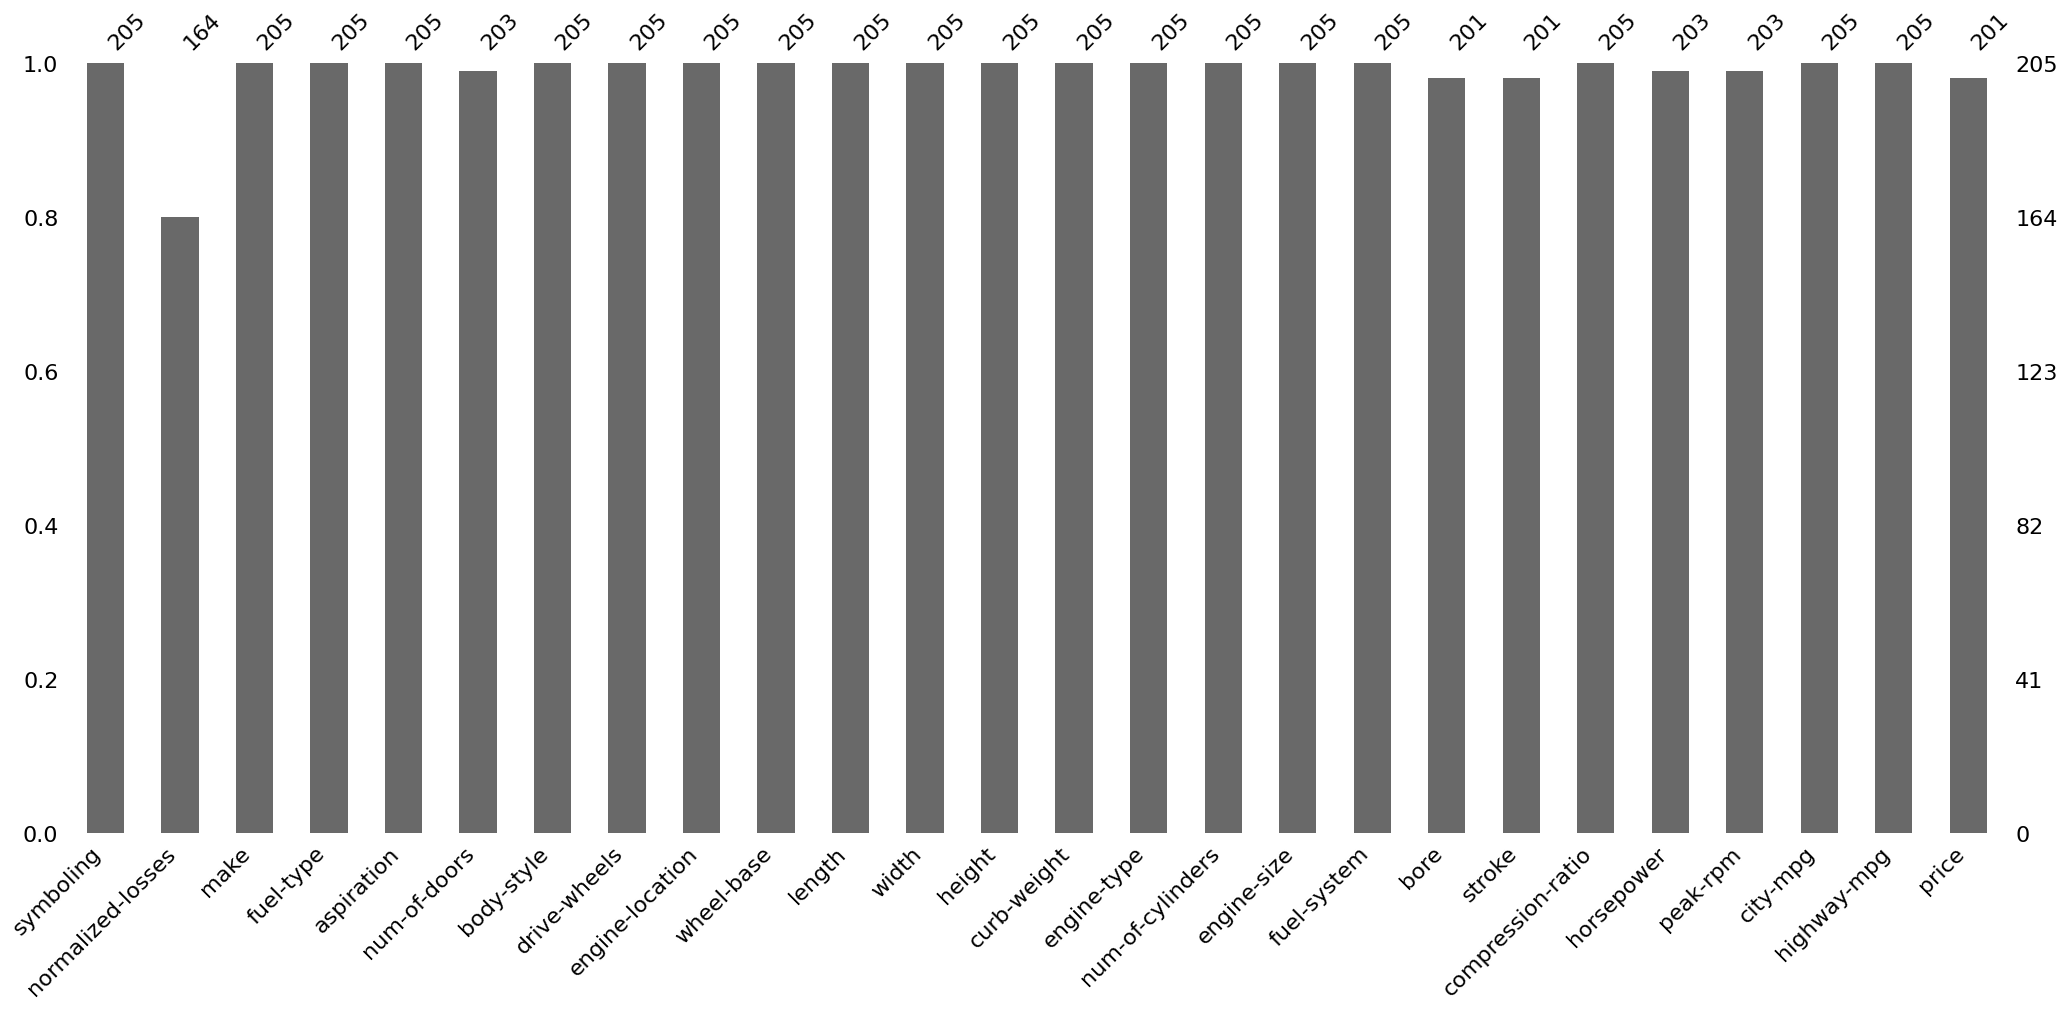

In [21]:
msno.bar(df)

<Axes: >

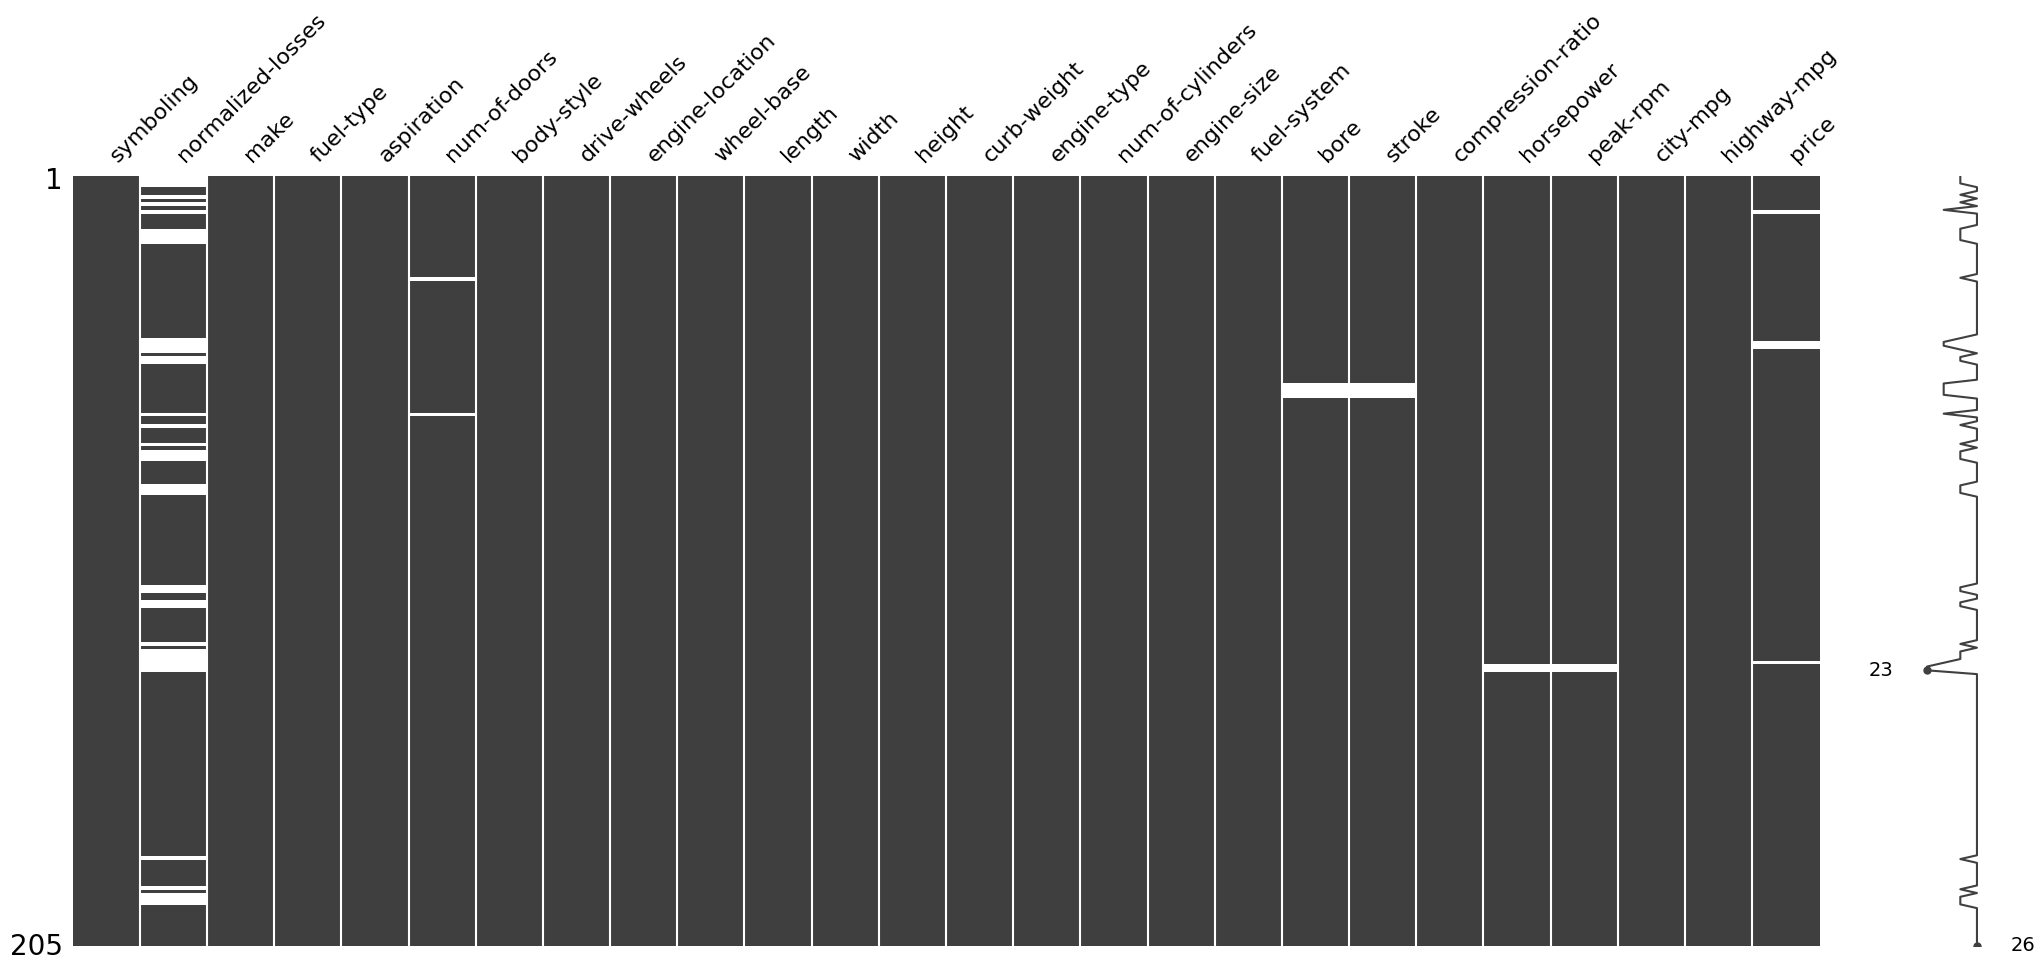

In [22]:
msno.matrix(df)

 As it can be seen, bore and stroke has missing values in same row. Most probably same brand. Also horse-power,peak-rpm and some normalized-losses values are missed in same rows.

# **Imputing Normalized-Losses Missing Values**

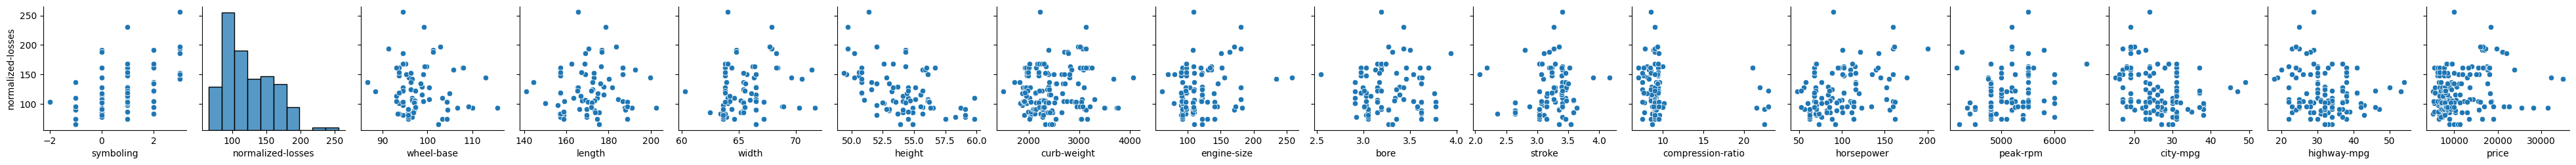

In [24]:
sns.pairplot(data=df,
             y_vars=["normalized-losses"],
             x_vars=df.select_dtypes(["float64","int64"]).columns)

 Normalized-losses doesn't have any strong correlations with other numerical variables in dataset. That's why imputing missing values with each brand's median is better choice.

In [25]:
res_list=[]
for i in df["make"].values:
  if i not in res_list:
    res_list.append(i)

In [26]:
res_list

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [27]:
for i in res_list:
  df["normalized-losses"].loc[(df["make"]==i)]=df["normalized-losses"].loc[(df["make"]==i)].fillna(df["normalized-losses"].loc[(df["make"]==i)].median(),axis=0)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-27-c05585f57d72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["normalized-losses"].loc[(df["make"]==i)]=df["normalized-losses"].loc[(df["make"]==i)].fillna(df["normalized-losses"].loc[(df["make"]==i)].median(),axis=0)
<ipython-input-27-c05585f57d72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["normalized-losses"].loc[(df["make"]==i)]=df["normalized-losses"].loc[(df["make"]==i)].fillna(df["normalized-losses"].loc[(df["make"]==i)

In [28]:
df.isnull().sum()

symboling             0
normalized-losses    10
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

 Since some brands' normalized-losses are completely missing, their missing values are filled by median of normalized-losses feature.

In [29]:
df["normalized-losses"]=df["normalized-losses"].fillna(df["normalized-losses"].median())

In [30]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

# **Imputing Missing Values of Num-Of-Doors**

In [31]:
df.loc[(df["num-of-doors"].isnull()==True)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,115.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


Both missing values are sedan.

In [32]:
df.loc[(df["make"]=="dodge") & (df["body-style"]=="sedan")]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0


In [33]:
df.loc[(df["make"]=="mazda") & (df["body-style"]=="sedan")]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,115.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,115.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


 Both brands' sedan cars have four doors. That's why those null values are filled by four

In [34]:
df["num-of-doors"]=df["num-of-doors"].fillna("four")

In [35]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

# **Imputing Missing Values of Bore**

In [36]:
df.loc[(df["bore"].isnull()==True)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


Whole missing values' brand is mazda and body-style is hatchback

In [37]:
df[df["make"]=="mazda"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,30,31,5195.0
51,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095.0
52,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0
59,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8845.0


<Axes: >

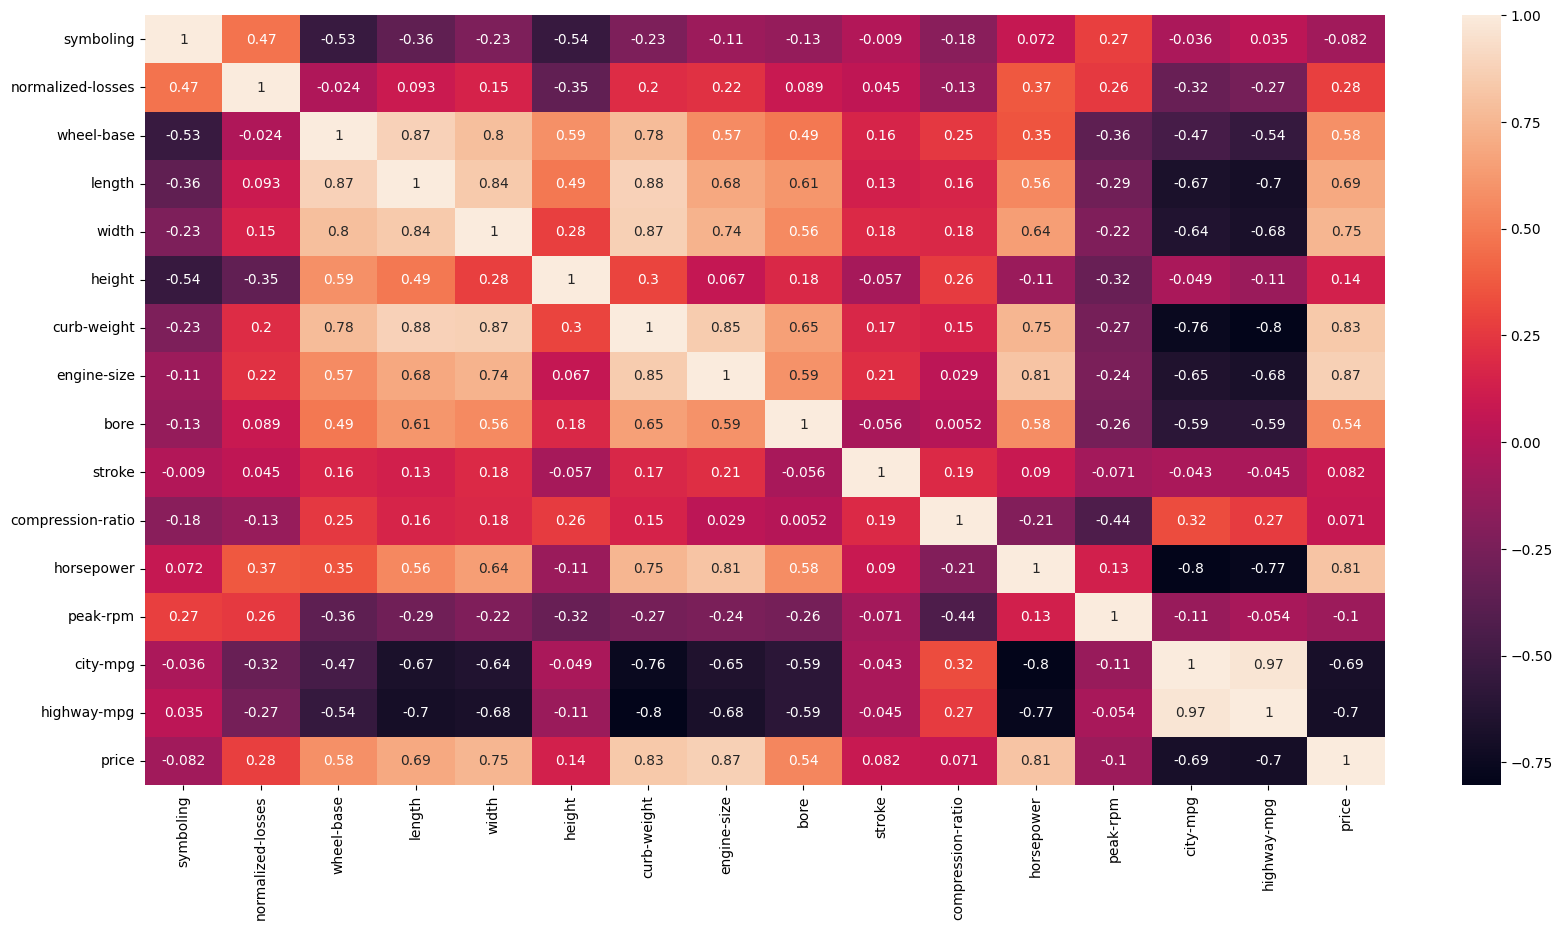

In [38]:
corr=df.select_dtypes(["int64","float64"]).corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

 Since still there are other mazda brand cars and bore feature has a good correlation with curb-weight, imputation is possible by looking similar median values of curb-weights of mazda cars.

In [39]:
df.loc[(df["bore"].isnull()==True)]["curb-weight"].median()

2382.5

In [40]:
df.loc[df["make"]=="mazda"].groupby("bore")["curb-weight"].median()

bore
3.03    1902.5
3.08    1950.0
3.39    2410.0
3.43    2700.0
3.76    2670.0
Name: curb-weight, dtype: float64

Closest median value belongs to 3.39 bore value. That's why it will be used for imputation.

In [41]:
df["bore"]=df["bore"].fillna(3.39)

In [42]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

# Imputing Missing Values of Stroke

In [43]:
df.loc[(df["stroke"].isnull()==True)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.39,NaN,9.4,135.0,6000.0,16,23,15645.0


As it was be estimated, stroke and bore belong same brands. Since stroke doesn't have any correlation with any numerical values, missing values are filled by looking mazda brand's stroke values' median.

In [44]:
df["stroke"]=df["stroke"].fillna(df["stroke"].loc[(df["make"]=="mazda")].median())

In [45]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

# **Dealing with Missing Values of Horsepower,Peak-Rgm and Price**

In [46]:
df.loc[(df["horsepower"].isnull()==True)&(df["peak-rpm"].isnull()==True)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,119.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,119.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [47]:
df.loc[(df["horsepower"].isnull()==True)]["city-mpg"].median()

23.0

In [48]:
df.loc[df["make"]=="renault"].groupby("horsepower")["city-mpg"].median()

Series([], Name: city-mpg, dtype: float64)

In [49]:
df["make"].value_counts(ascending=True)

make
mercury           1
renault           2
jaguar            3
alfa-romero       3
chevrolet         3
isuzu             4
porsche           5
saab              6
audi              7
plymouth          7
bmw               8
mercedes-benz     8
dodge             9
volvo            11
peugot           11
volkswagen       12
subaru           12
mitsubishi       13
honda            13
mazda            17
nissan           18
toyota           32
Name: count, dtype: int64

As it can be seen, both missing values are in horsepower and peak-rgm belongs to same brand. Although they have correlation with some numerical features, they also represent a brand's all cars. That's why dropping them will be better.

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,125.319512,35.630134,65.00,94.00,119.00,153.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.330927,0.270973,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.258049,0.314152,2.07,3.11,3.29,3.41,4.17


As table indicates, std of price is high and there is a big gap between min and max. Since it is dependent value and also has a few missing values, deropping it is also better.

In [51]:
list_dropna=["horsepower","peak-rpm","price"]

In [53]:
df.dropna(subset=list_dropna,inplace=True)

In [54]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,119.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,119.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,119.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [55]:
df.reset_index(drop=True, inplace=True)

In [56]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# **Converting categorical texts that refers numbers to numerical values**

In [57]:
df["num-of-doors"].nunique()

2

In [58]:
df["num-of-doors"].values

['two', 'two', 'two', 'four', 'four', ..., 'four', 'four', 'four', 'four', 'four']
Length: 199
Categories (2, object): ['four', 'two']

In [59]:
df["num-of-doors"]=df["num-of-doors"].replace(["two","four"],[2,4])

In [60]:
df["num-of-doors"].values

[2, 2, 2, 4, 4, ..., 4, 4, 4, 4, 4]
Length: 199
Categories (2, int64): [4, 2]

In [61]:
df["num-of-doors"]=df["num-of-doors"].astype("int64")

In [62]:
df["num-of-cylinders"].nunique()

7

In [63]:
df["num-of-cylinders"].values

['four', 'four', 'six', 'four', 'five', ..., 'four', 'four', 'six', 'six', 'four']
Length: 199
Categories (7, object): ['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']

In [64]:
df["num-of-cylinders"]=df["num-of-cylinders"].replace(["eight","five","four","six","three","twelve","two"],[8,5,4,6,3,12,2])

In [65]:
df["num-of-cylinders"].values

[4, 4, 6, 4, 5, ..., 4, 4, 6, 6, 4]
Length: 199
Categories (7, int64): [8, 5, 4, 6, 3, 12, 2]

In [66]:
df["num-of-cylinders"]=df["num-of-cylinders"].astype("int64")

# **Label Encoding**

In [67]:
df_le = df.copy()

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df_le[column_name] = label_encoder.fit_transform(df[column_name])

In [68]:
label_variables=df.select_dtypes("category")

In [69]:
for col in label_variables:
  label_encoding(col)
df_le.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,119.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,119.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,119.0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [70]:
df_new=df_le

In [71]:
df_new.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# **Scaling the Dataset**

In [72]:
X=df_new.drop("price",axis=1)
y=df_new["price"]

In [73]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

# **Train-Test-Validation Split**

In [74]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.2,random_state=42)
X_cv,X_test,y_cv,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [75]:
n_cols=X_train.shape[1]

In [76]:
n_cols

25

In [77]:
X_train.size

3975

# **Layer and Neuron Arrangement**

In [78]:
model=Sequential()
model.add(Dense(128,activation="relu",input_shape=(n_cols,)))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="linear"))

Relu function is used for hidden layers and for output layers linear function is used. For optimizer adam is used and since it is a regression problem, mean squared error and mean absolute error were used as metric.

In [79]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="mean_squared_error",metrics=["mean_squared_error", "mean_absolute_error"] )
epochs=100

In [80]:
history=model.fit(X_train,y_train,validation_data=(X_cv,y_cv),epochs=epochs)

Epoch 1/100
5/5 [==============================] - 2s 99ms/step - loss: 200543040.0000 - mean_squared_error: 200543040.0000 - mean_absolute_error: 12384.2988 - val_loss: 425340608.0000 - val_mean_squared_error: 425340608.0000 - val_mean_absolute_error: 17100.8906
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 200053088.0000 - mean_squared_error: 200053088.0000 - mean_absolute_error: 12365.3867 - val_loss: 423119552.0000 - val_mean_squared_error: 423119552.0000 - val_mean_absolute_error: 17048.1875
Epoch 3/100
5/5 [==============================] - 0s 22ms/step - loss: 197877664.0000 - mean_squared_error: 197877664.0000 - mean_absolute_error: 12285.5986 - val_loss: 414763072.0000 - val_mean_squared_error: 414763072.0000 - val_mean_absolute_error: 16855.0996
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 190162240.0000 - mean_squared_error: 190162240.0000 - mean_absolute_error: 12030.5303 - val_loss: 391166848.0000 - val_mean_squared_erro

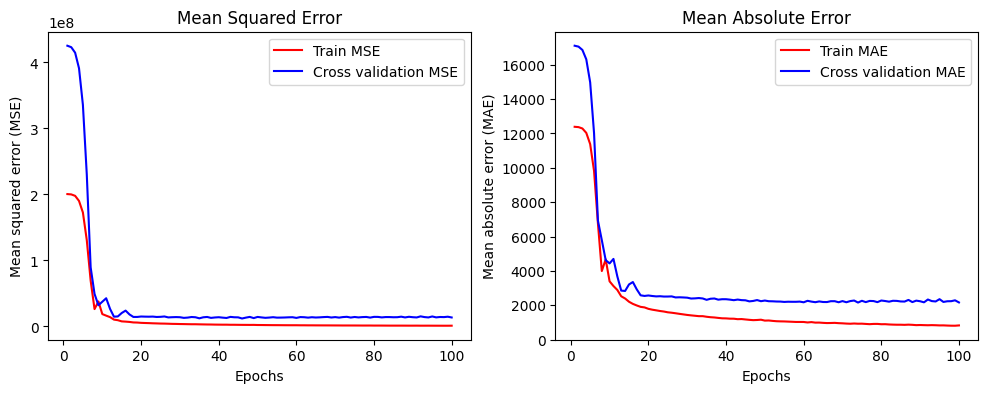

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(np.arange(1, epochs+1), history.history["mean_squared_error"], color="red", label="Train MSE")
ax1.plot(np.arange(1, epochs+1), history.history["val_mean_squared_error"], color="blue", label="Cross validation MSE")
ax2.plot(np.arange(1, epochs+1), history.history["mean_absolute_error"], color="red", label="Train MAE")
ax2.plot(np.arange(1, epochs+1), history.history["val_mean_absolute_error"], color="blue", label="Cross validation MAE")
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Mean squared error (MSE)")
ax1.set_title("Mean Squared Error")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Mean absolute error (MAE)")
ax2.set_title("Mean Absolute Error")
plt.show()

# **Regularization**

In [82]:
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 1]
train_mse = []
train_mae = []
cv_mse = []
cv_mae = []


for l in lambdas:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation="relu",input_shape=(n_cols,), kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(8, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(4, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(1, activation="linear")
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics=["mean_squared_error", "mean_absolute_error"])

    history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=100)

    train_mse.append(history.history["mean_squared_error"][-1])
    train_mae.append(history.history["mean_absolute_error"][-1])
    cv_mse.append(history.history["val_mean_squared_error"][-1])
    cv_mae.append(history.history["val_mean_absolute_error"][-1])

Epoch 1/100
5/5 [==============================] - 3s 104ms/step - loss: 200535248.0000 - mean_squared_error: 200535248.0000 - mean_absolute_error: 12384.4863 - val_loss: 425239936.0000 - val_mean_squared_error: 425239936.0000 - val_mean_absolute_error: 17100.3027
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 199765344.0000 - mean_squared_error: 199765344.0000 - mean_absolute_error: 12361.0039 - val_loss: 421002816.0000 - val_mean_squared_error: 421002816.0000 - val_mean_absolute_error: 17010.9648
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 194503504.0000 - mean_squared_error: 194503504.0000 - mean_absolute_error: 12195.7041 - val_loss: 398157568.0000 - val_mean_squared_error: 398157568.0000 - val_mean_absolute_error: 16514.0098
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 169421696.0000 - mean_squared_error: 169421696.0000 - mean_absolute_error: 11377.0967 - val_loss: 306980032.0000 - val_mean_squared_err

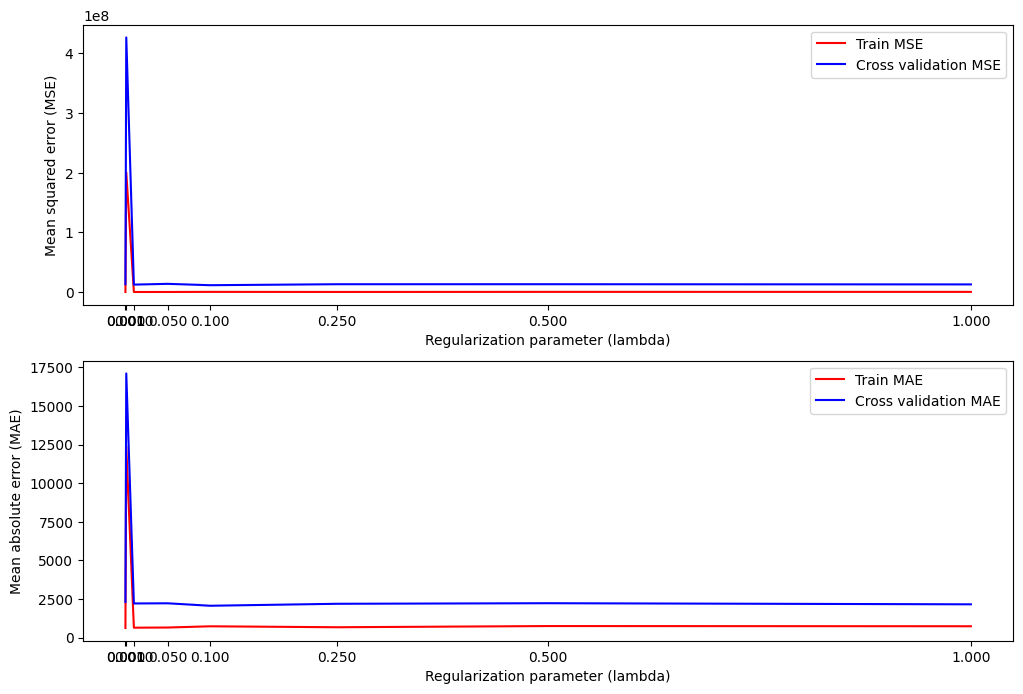

In [83]:
figs, axs = plt.subplots(2,1, figsize=(12,8))
axs[0].plot(lambdas, train_mse, color="red", label="Train MSE")
axs[0].plot(lambdas, cv_mse, color="blue", label="Cross validation MSE")
axs[0].set_xticks(lambdas)
axs[0].legend(loc="upper right")
axs[0].set_xlabel("Regularization parameter (lambda)")
axs[0].set_ylabel("Mean squared error (MSE)")
axs[1].plot(lambdas, train_mae, color="red", label="Train MAE")
axs[1].plot(lambdas, cv_mae, color="blue", label="Cross validation MAE")
axs[1].set_xticks(lambdas)
axs[1].legend(loc="upper right")
axs[1].set_xlabel("Regularization parameter (lambda)")
axs[1].set_ylabel("Mean absolute error (MAE)")
plt.show()

Among different alpha values for L2 regularization, "1" is be selected.

In [84]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation="relu",input_shape=(n_cols,), kernel_regularizer=tf.keras.regularizers.l2(1)),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(1)),
        tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(1)),
        tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(1)),
        tf.keras.layers.Dense(8, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(1)),
        tf.keras.layers.Dense(4, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(1)),
        tf.keras.layers.Dense(1, activation="linear")
    ])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics=["mean_squared_error", "mean_absolute_error"])

history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=100)



Epoch 1/100
5/5 [==============================] - 2s 74ms/step - loss: 200415584.0000 - mean_squared_error: 200415360.0000 - mean_absolute_error: 12380.1807 - val_loss: 424317376.0000 - val_mean_squared_error: 424317152.0000 - val_mean_absolute_error: 17077.9180
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 198113440.0000 - mean_squared_error: 198113216.0000 - mean_absolute_error: 12303.9150 - val_loss: 412624096.0000 - val_mean_squared_error: 412623808.0000 - val_mean_absolute_error: 16819.8164
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 184833024.0000 - mean_squared_error: 184832736.0000 - mean_absolute_error: 11870.9893 - val_loss: 354198880.0000 - val_mean_squared_error: 354198528.0000 - val_mean_absolute_error: 15506.2158
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 129648896.0000 - mean_squared_error: 129648488.0000 - mean_absolute_error: 9947.4307 - val_loss: 172386464.0000 - val_mean_squared_error

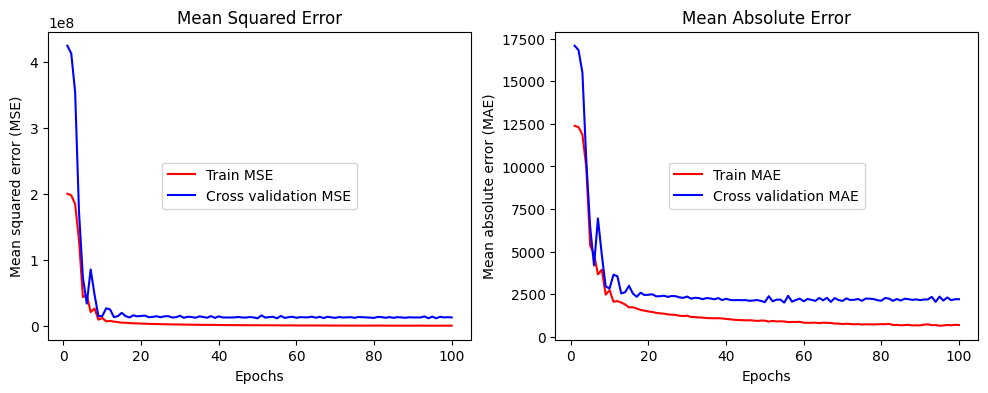

In [85]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(np.arange(1, epochs+1), history.history["mean_squared_error"], color="red", label="Train MSE")
ax1.plot(np.arange(1, epochs+1), history.history["val_mean_squared_error"], color="blue", label="Cross validation MSE")
ax2.plot(np.arange(1, epochs+1), history.history["mean_absolute_error"], color="red", label="Train MAE")
ax2.plot(np.arange(1, epochs+1), history.history["val_mean_absolute_error"], color="blue", label="Cross validation MAE")
ax1.legend(loc="center")
ax2.legend(loc="center")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Mean squared error (MSE)")
ax1.set_title("Mean Squared Error")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Mean absolute error (MAE)")
ax2.set_title("Mean Absolute Error")
plt.show()

In [86]:
yhat_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, yhat_test)
mae_test = mean_absolute_error(y_test, yhat_test)

print(mse_test)
print(mae_test)

1/1 [==============================] - 0s 293ms/step
3285990.3342741607
1401.5757080078124


To calculate R2_score of model, this formula is used.

In [87]:
r2_score_model=1-(mse_test/np.var(y))

In [88]:
r2_score_model

0.9481213020373621

Our neural network model gave %95 R2_score for this regression problem.